<a href="https://colab.research.google.com/github/EvanR2022/Stats-Notebook/blob/main/Evan_Rudman_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [44]:
%%capture
!pip install wandb
!apt-get install poppler-utils #We imported all our programs needed to carry out our project.
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [45]:
def GPU(data): #We defined multiple of our data features so the computer understands their meaning and value when we enter them.
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [46]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device) #We created the variable models and labels.
model.eval();

In [47]:
url = "https://docs.google.com/presentation/d/1FYzaWfu8LuClyitaqtqVl-LeA3pQuVL5snnmz0h99i8/edit#slide=id.g1a1a0952203_0_249" #We imported our google slide of our project photos.

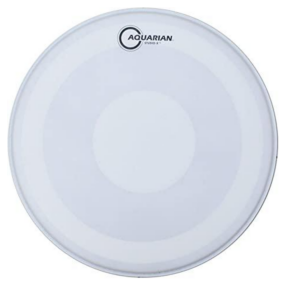

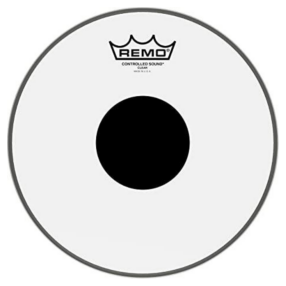

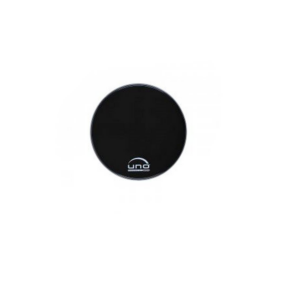

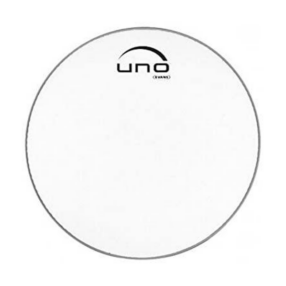

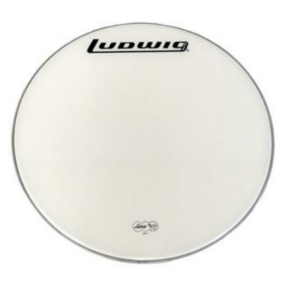

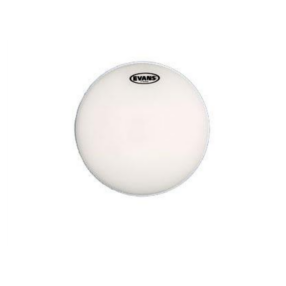

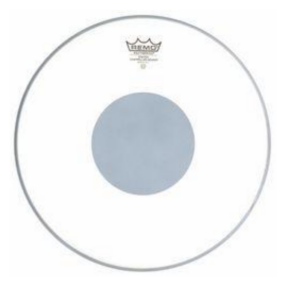

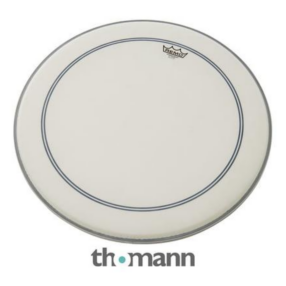

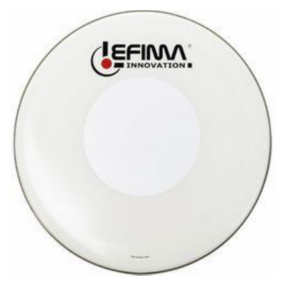

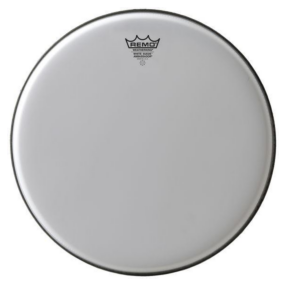

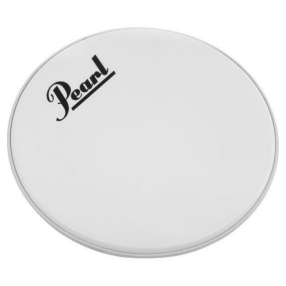

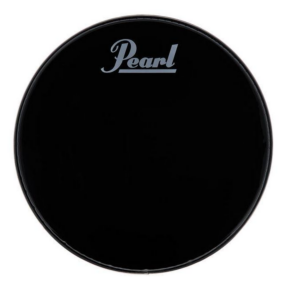

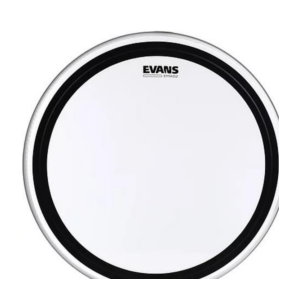

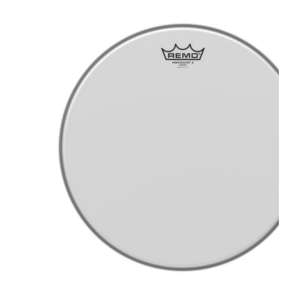

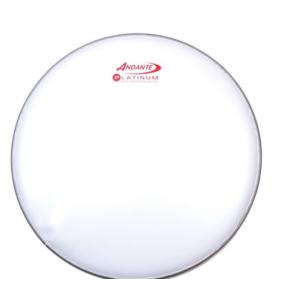

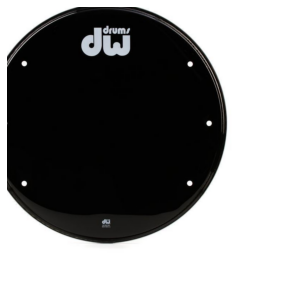

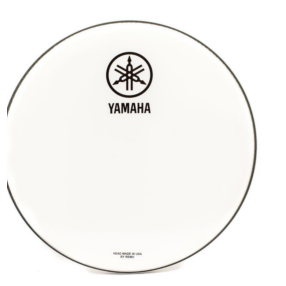

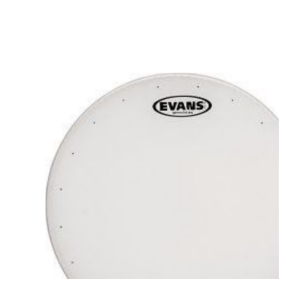

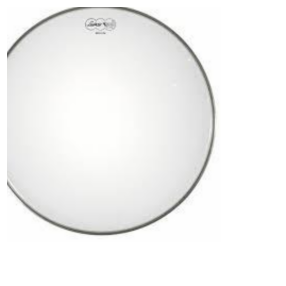

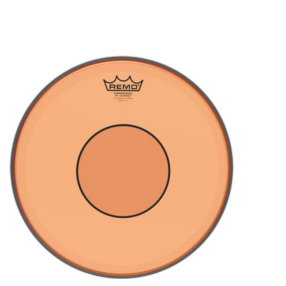

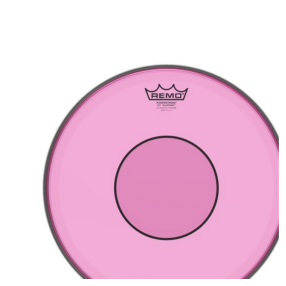

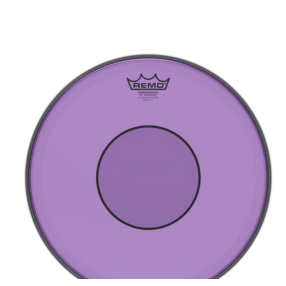

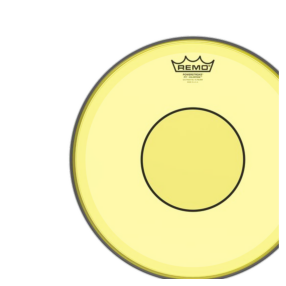

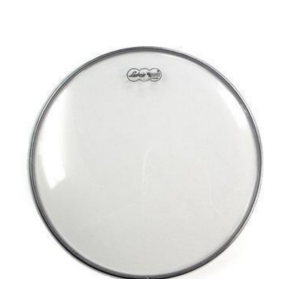

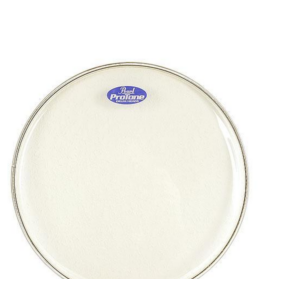

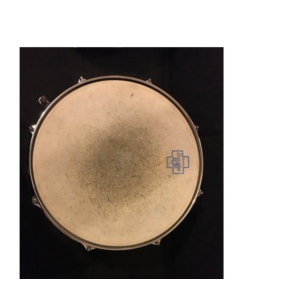

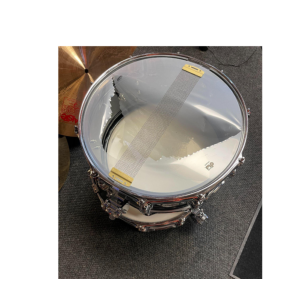

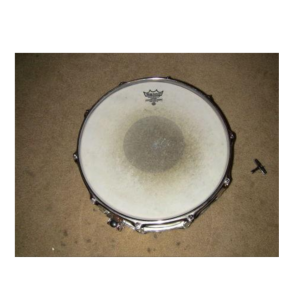

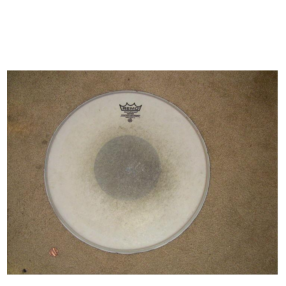

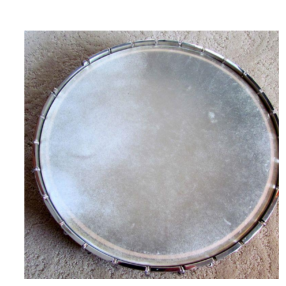

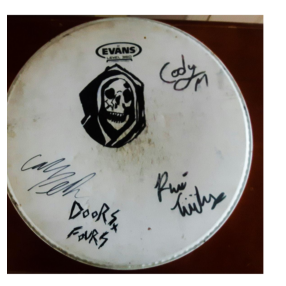

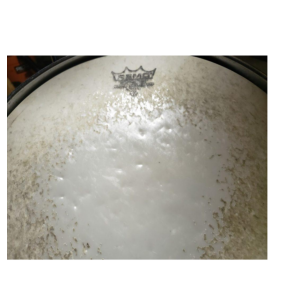

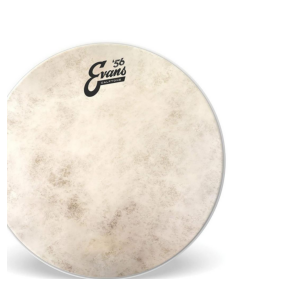

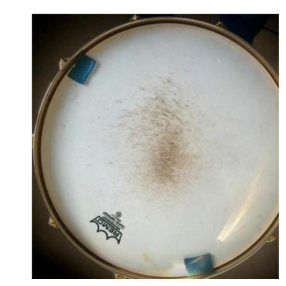

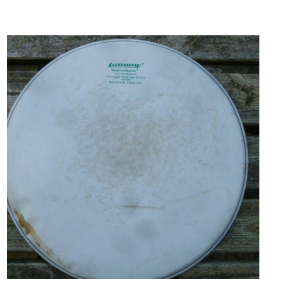

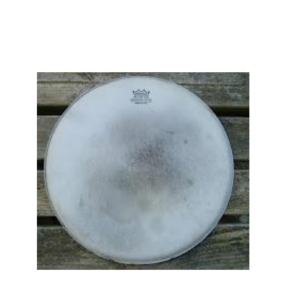

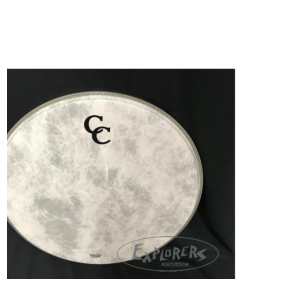

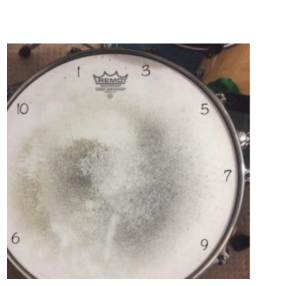

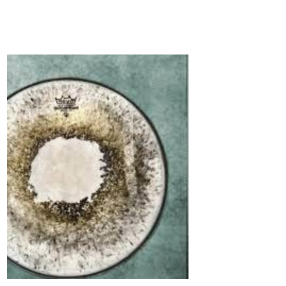

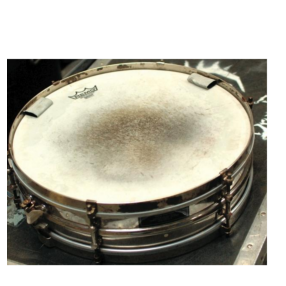

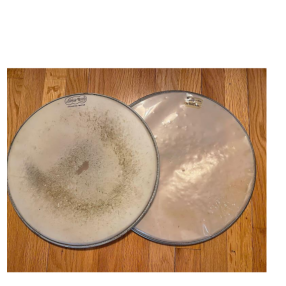

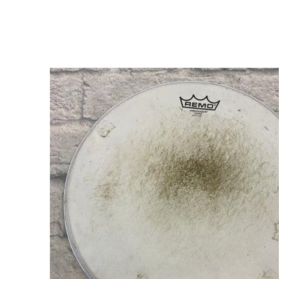

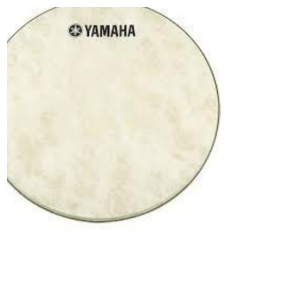

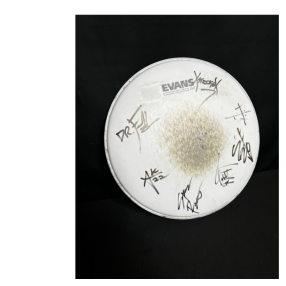

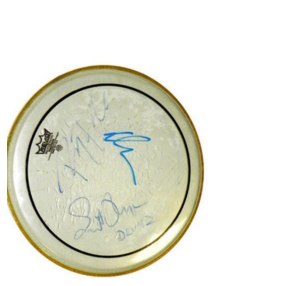

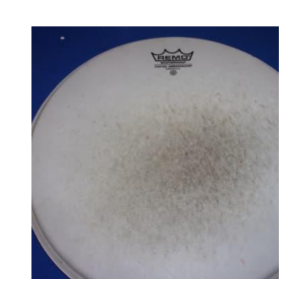

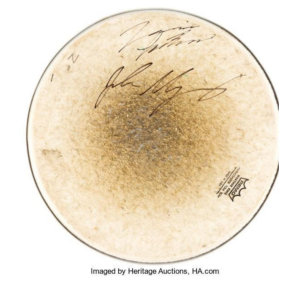

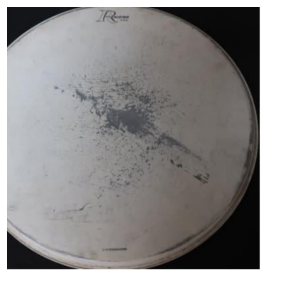

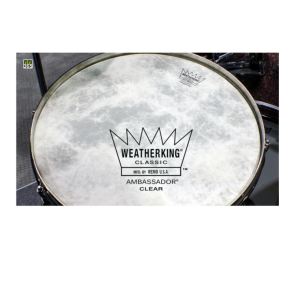

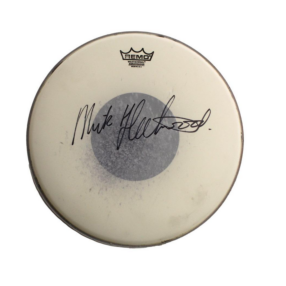

In [48]:
images = [] #We created the variable images and told the computer to list the photos from our dataset.

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [49]:
images.shape #We asked for the shape of our images.

torch.Size([50, 3, 224, 224])

In [50]:
model(images) #We asked for a model data set of our images.

tensor([[-3.6159,  1.4465, -2.8118,  ..., -4.5261, -0.3944,  6.8728],
        [-2.5897, -3.1742, -1.0269,  ..., -3.0363, -2.0790,  9.3937],
        [ 0.1462, -1.9371, -1.7744,  ..., -0.5891, -1.7510,  5.1120],
        ...,
        [-3.0952, -0.4930,  1.4707,  ...,  3.6889,  2.0192,  6.7804],
        [-3.5207, -4.1885, -1.7786,  ..., -2.9570, -0.2648,  8.8870],
        [-1.9973, -3.2124, -1.7361,  ..., -2.0868, -0.0736,  6.8371]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [51]:
y = model(images) #We created the variable Y.

In [52]:
y.shape #We asked for the shape of Y.

torch.Size([50, 1000])

In [53]:
guesses = torch.argmax(y, 1).cpu().numpy() #We created the variable guesses.

In [54]:
for i in list(guesses): #We told the computer to list all the guesses that it thinks our photos are.
    print(labels[i])

toilet seat
CD player
puck, hockey puck
mouse, computer mouse
CD player
mouse, computer mouse
gong, tam-tam
face powder
CD player
mouse, computer mouse
rugby ball
puck, hockey puck
hook, claw
mouse, computer mouse
mouse, computer mouse
analog clock
CD player
mouse, computer mouse
mouse, computer mouse
face powder
face powder
wall clock
wall clock
modem
CD player
face powder
loupe, jeweler's loupe
cowboy hat, ten-gallon hat
iPod
Petri dish
pick, plectrum, plectron
whiskey jug
golf ball
drum, membranophone, tympan
toilet seat
golf ball
golf ball
drum, membranophone, tympan
gong, tam-tam
drum, membranophone, tympan
dough
shovel
pick, plectrum, plectron
stopwatch, stop watch
wall clock
toilet seat
face powder
face powder
paper towel
gong, tam-tam


In [55]:
Y = np.zeros(50,) #We gave Y a new value and asked for the value of Y at 25.
Y[25:] = 1

In [56]:
Y #We asked for the value of Y.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
X = y.detach().cpu().numpy() #We created the variable X.

In [58]:
X.shape #We asked for the shape of X.

(50, 1000)

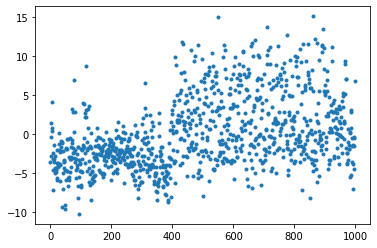

In [59]:
plt.plot(X[0],'.') #We plotted X at 0.

In [ ]:
X[0] #We asked for the value of X at 0.

In [61]:
np.argmax(X[0]) #We asked for the max of X at 0.

861

In [62]:
labels[948] #We asked for the name of label 948.

'Granny Smith'

In [63]:
top_ten = np.argsort(X[0])[::-1][0:10] #We created the variable, top_ten.

In [64]:
for i in top_ten: #We printed the top ten guesses of what are photos are of.
    print(labels[i])

toilet seat
face powder
Petri dish
washbasin, handbasin, washbowl, lavabo, wash-hand basin
scale, weighing machine
tray
mouse, computer mouse
bathing cap, swimming cap
tub, vat
modem


In [65]:
labels #We asked for the list of labels.

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 15.,  78., 223., 269., 149.,  98.,  82.,  53.,  28.,   5.]),
 array([-10.262142 ,  -7.723369 ,  -5.1845965,  -2.6458235,  -0.1070507,
          2.4317222,   4.970495 ,   7.509268 ,  10.04804  ,  12.586814 ,
         15.1255865], dtype=float32),
 <a list of 10 Patch objects>)

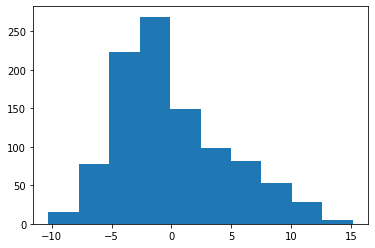

In [66]:
plt.hist(X[0]) #We plotted a histogram of X at 0.

In [67]:
X = GPU_data(X) #We gave the variable X and Y new values.
Y = GPU_data(Y)

In [68]:
def softmax(x): #We defined softmax(x).
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [69]:
def cross_entropy(outputs, labels):    #We defined cross_entropy.        
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [70]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [71]:
def Truncated_Normal(size): #We defined Truncated_Normal(size).

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [72]:
def acc(out,y): #We defined acc(out,y).
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [73]:
X.shape #We asked for the shape of X.

torch.Size([50, 1000])

In [74]:
def get_batch(mode): #We defined get_batch(mode).
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [75]:
def model(x,w): #We defined model(x,w).

    return x@w[0]

In [76]:
def make_plots(): #We defined make_plots.
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [79]:
wb.init(project="Linear_Model_Photo_1"); #We imported the coding to run the weight and biases system to find the best guesses for our data.
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▁██▁███▁▁█▁▁█▁██▁████▁▁█▁█▁██▁▁▁▁███████
loss,█▁▁▅▁▁▁▅▅▁▅▅▁▅▁▁▅▁▁▁▁▅▅▁▅▁▅▁▁▅▅▅▅▁▁▁▁▁▁▁
acc_train,0.90625
loss,0.40701


<ipython-input-45-0738e4875848>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

Best Run = 0.9252 Worst Run = 0.5021 Average = 0.7656 

In [80]:
#We wrote the best,worst, and average of the runs.